In [32]:
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input,MaxPooling2D,Conv2D,Flatten
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [33]:
train_images.shape

(60000, 28, 28, 1)

In [34]:
train_labels.shape

(60000, 10)

In [35]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 32)        8224      
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                294976    
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                     

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


2024-05-05 10:56:47.232606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 [==============================] - 17s 21ms/step - loss: 0.2336 - accuracy: 0.9310 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 2/5
750/750 [==============================] - 15s 20ms/step - loss: 0.0960 - accuracy: 0.9726 - val_loss: 0.0895 - val_accuracy: 0.9760
Epoch 3/5
750/750 [==============================] - 16s 21ms/step - loss: 0.1062 - accuracy: 0.9743 - val_loss: 0.1620 - val_accuracy: 0.9721
Epoch 4/5
750/750 [==============================] - 15s 20ms/step - loss: 0.1608 - accuracy: 0.9728 - val_loss: 0.3696 - val_accuracy: 0.9652
Epoch 5/5
750/750 [==============================] - 15s 20ms/step - loss: 0.3660 - accuracy: 0.9691 - val_loss: 0.4391 - val_accuracy: 0.9753


In [38]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.3910 - accuracy: 0.9767


[0.39096859097480774, 0.9767000079154968]

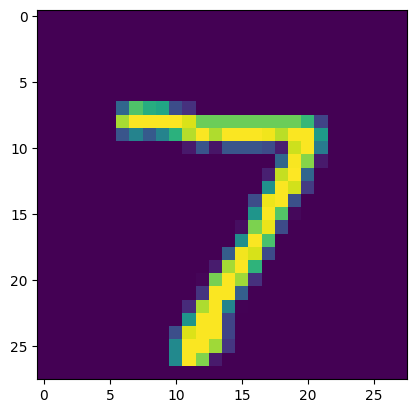

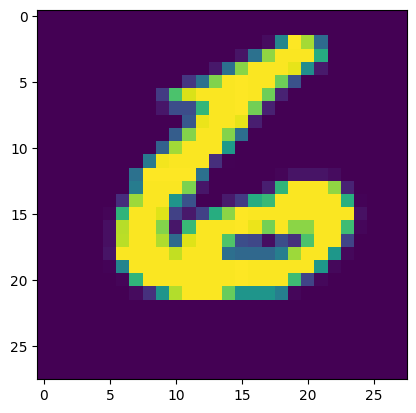

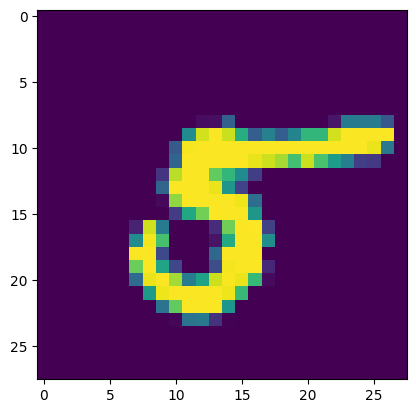

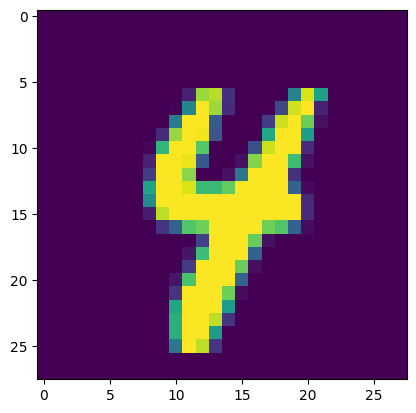

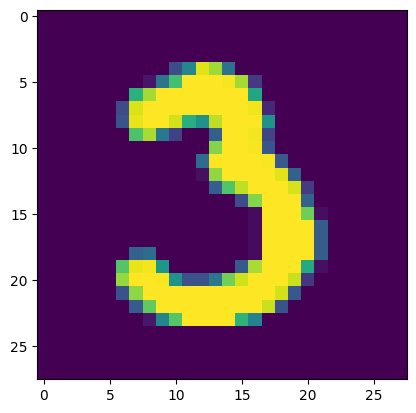

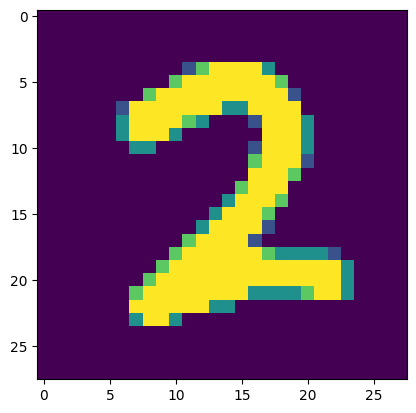

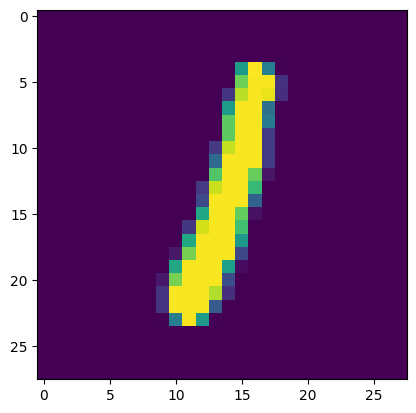

In [48]:
import matplotlib.pyplot as plt 
for i in range(7):
    plt.imshow(test_images[-i].reshape(28,28))
    plt.show()